<a href="https://colab.research.google.com/github/wendianaxu/speech-emotion-recognition/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone https://github.com/wendianaxu/speech-emotion-recognition.git

fatal: destination path 'speech-emotion-recognition' already exists and is not an empty directory.


In [6]:
pwd

'/content'

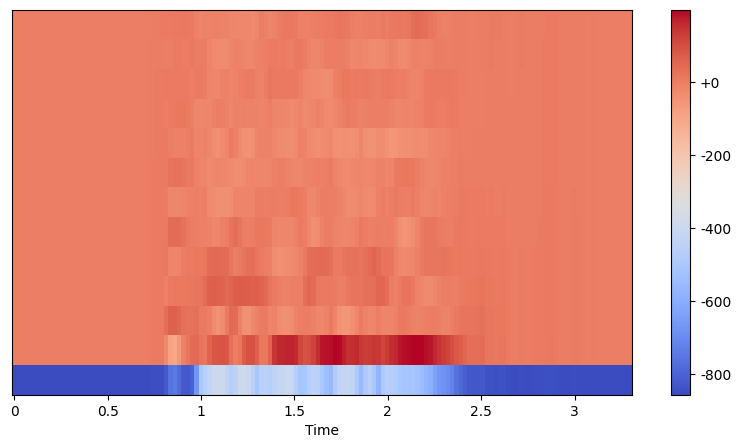

In [7]:
# test: load an audio file, extract mfccs, and visualize

test_file = "/content/speech-emotion-recognition/RAVDESS_data/Actor_01/03-01-01-01-01-01-01.wav"
n_mfcc = 13 # common choice
sr = 22050 # sampling rate

# visualize mfccs
audio, sampling_rate = librosa.load(test_file, sr=sr, duration=None)
test_mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(10, 5))
librosa.display.specshow(test_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


In [8]:
# function for loading an audio file
data_path = "/content/speech-emotion-recognition/RAVDESS_data/"
def load_file(path):
  '''
  Load one audio file and return a 1D array containing its mfccs averaged across time
  '''
  audio, sampling_rate = librosa.load(path, sr=sr, duration=None)
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc) # extract MFCC matrix (cols = coefficients, rows = time)
  features = np.mean(mfccs.T, axis=0)  # condense MFCC matrix into 1D array, averaging each coefficient across time
  return features

load_file(test_file)


array([-6.9779260e+02,  5.4890041e+01,  6.6346717e-01,  1.2435785e+01,
        7.7339525e+00,  5.3074998e-01, -3.2166307e+00, -3.1593947e+00,
       -1.0977551e+01, -2.8487110e+00,  8.1529766e-01, -3.0370672e+00,
        1.9554471e+00], dtype=float32)

In [9]:
# function for preprocessing data
def preprocess_data(path):
  '''
  Preprocess data in all folders within the dataset. 
  '''
  X = []
  y = []
  for folder in os.listdir(path): # each folder = one actor
      for file in os.listdir(os.path.join(path, folder)):
          if file.endswith('.wav'):
              emotion = file.split('-')[2] # get emotion label
              if int(emotion) == 1:
                  label = 'Neutral'
              elif int(emotion) == 2:
                  label = 'Calm'
              elif int(emotion) == 3:
                  label = 'Happy'
              elif int(emotion) == 4:
                  label = 'Sad'
              elif int(emotion) == 5:
                  label = 'Angry'
              elif int(emotion) == 6:
                  label = 'Fearful'
              elif int(emotion) == 7:
                  label = 'Disgust'
              elif int(emotion) == 8:
                  label = 'Surprised'
              else:
                  label = 'UNK'
                  
              file_path = os.path.join(path, folder, file)
              features = load_file(file_path)
              X.append(features)
              y.append(label)
  return np.array(X), np.array(y)


In [10]:
X, y = preprocess_data(data_path)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 13)
Shape of y: (1440,)


In [11]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [12]:
# inspect training data
import pandas as pd
df = pd.DataFrame(X_train)
df["label"] = y_train

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-355.840851,27.353868,-35.878235,-6.460089,-15.599998,-14.640553,-8.840479,-16.646618,-2.903486,-0.854543,-6.354803,2.329089,0.468156,Fearful
1,-496.972626,32.771957,-25.746128,2.842844,-8.916679,-9.610416,-9.263019,-22.260599,-13.259587,-3.681676,-13.249468,-6.624545,-6.387933,Surprised
2,-472.230804,43.444611,-14.952088,2.036252,-3.567228,-6.554597,-14.047055,-12.088764,-9.804029,-12.164199,-0.721901,-6.485571,-8.327799,Fearful
3,-652.709412,52.740593,17.851471,13.533674,9.304794,3.627707,2.197796,-0.649115,-1.761551,-3.236958,3.258072,-0.363323,-1.849701,Happy
4,-425.366364,28.141975,-18.408752,2.342423,-10.613114,-12.770652,-4.541979,-13.798555,-12.134354,3.646712,-8.831520,-4.770383,-1.562329,Angry


In [15]:
def visualize_by_statement(path, intensity = '01', repetition = '01', actor = '01'):
  '''
   
  '''
  X = []
  y = []
  color = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
  x_values = range(13)
  for file in os.listdir(os.path.join(path, 'Actor_'+ actor)):
      if file.split('-')[3] == intensity and file.split('-')[5] == repetition:
          emotion = file.split('-')[2] # get emotion label
          if int(emotion) == 1:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[0])
          elif int(emotion) == 2:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[1])
          elif int(emotion) == 3:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[2])
          elif int(emotion) == 4:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[3])
          elif int(emotion) == 5:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[4])
          elif int(emotion) == 6:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[5])
          elif int(emotion) == 7:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[6])
          elif int(emotion) == 8:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[7])
  
  plt.xlabel('Features')
  plt.ylabel('MFCC Values')
  plt.legend()
  plt.show()

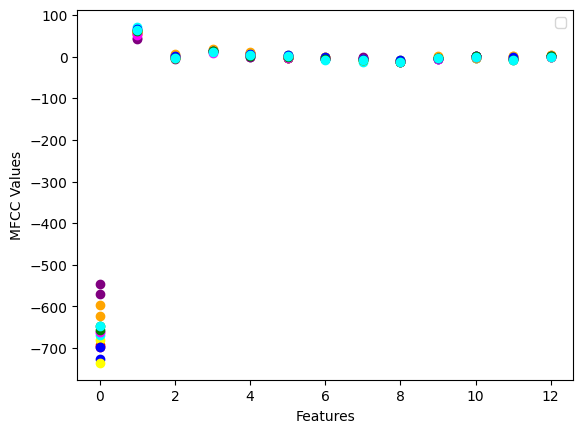

In [16]:
visualize_by_statement(data_path)

In [17]:
# sort emotions into bins
Neutral = []
Calm = []
Happy = []
Sad = []
Angry = []
Fearful = []
Disgust = []
Surprised = []
UNK = []

def emo_classification(X, y):
  for i in range(X.shape[0]):
    if y[i] == 'Neutral':
      Neutral.append(X[i])
    elif y[i] == 'Calm':
      Calm.append(X[i])
    elif y[i] == 'Happy':
      Happy.append(X[i])
    elif y[i] == 'Sad':
      Sad.append(X[i])
    elif y[i] == 'Angry':
      Angry.append(X[i])
    elif y[i] == 'Fearful':
      Fearful.append(X[i])
    elif y[i] == 'Disgust':
      Disgust.append(X[i])
    elif y[i] == 'Surprised':
      Surprised.append(X[i])
    elif y[i] == 'UNK':
      UNK.append(X[i])

emo_classification(X, y)